In [6]:
import numpy as np
import matplotlib
import codecs

matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import unicode_literals

att, align = [], []
with open('train_result.HiEn') as f:
    sentence = []
    lines = f.readlines()
    l = 1 
    while l < len(lines):
        if lines[l] == '\n':
            l = l + 1
            att.append(np.array(sentence))
            sentence = []
        else:
            values = lines[l].split('\t')
            token = np.array([np.round(float(x), 3) for x in values[1:-1]])
            token = token/np.sum(token)
            sentence.append(token)
        l = l + 1
    att.append(sentence)


# keep end of sentence marker?
    
source = []
t = codecs.open('../data/train.Hi', encoding='utf-8')
train_data = t.readlines()  
for sent in train_data:
    sent = sent.splitlines()[0]
    source.append(sent.split(' '))
    
target = []
train_data = open('../data/train.En').readlines()  
for sent in train_data:
    sent = sent.splitlines()[0]
    target.append(sent.split(' '))
        
with open('alignmentHi-En.txt') as f:
    sentence = []
    for line in f:
        if line == '\n':
            align.append(np.array(sentence).T)
            sentence = []
        else:
            values = line.split('\t')
#             print (values)
            token = [float(x) for x in values[:-1]]
            sentence.append(token)

    
    

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [124]:
numlines = len(att)
numlines = 1748
sqe = np.empty(numlines)
slen = np.empty(numlines)

sqlarge, sqsmall, sqmed = [], [], []

for i in range(numlines):
    x = 0.0
    att_size = np.shape(att[i])[0]
    align_size = np.shape(align[i])[0]
    size = min(att_size, align_size)
    x = np.sum(np.square((att[i][:size] - align[i][:size])))
    if (att_size > size) :
        x += np.sum(np.square(att[i][size:att_size]))                   
    elif align_size > size:
        x += np.sum(np.square(align[i][size:align_size]))
    sqe[i] = np.sqrt(x)/att_size
    slen[i] = np.shape(att[i])[1]
    if slen[i] > 7:
        sqlarge.append(sqe[i])
    elif slen[i] > 4:
        sqmed.append(sqe[i])
    else:
        sqsmall.append(sqe[i])
    
        

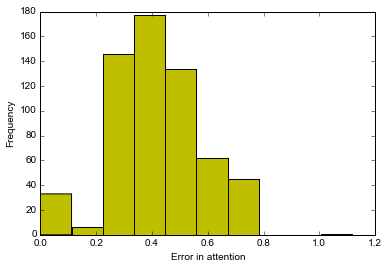

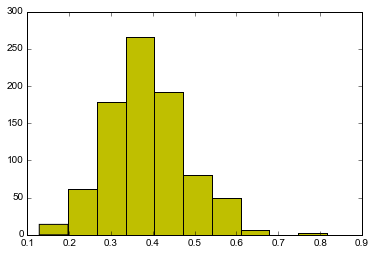

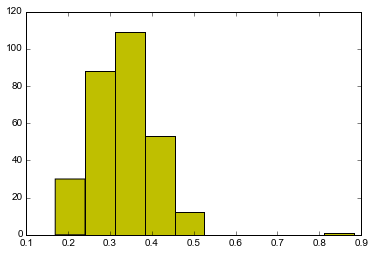

1.11803398875
0.0


In [126]:
plt.xlabel("Error in attention")
plt.ylabel("Frequency")
plt.hist(sqsmall, color='y', label='small')
plt.show()
plt.hist(sqmed, color='y', label='small')
plt.show()
plt.hist(sqlarge, color='y', label='small')
plt.show()

print(np.max(sqe))
print(np.min(sqe))

['क', '्', 'व', 'ी', 'न', '्', 'स', 'ल', 'ै', 'ं', 'ड']


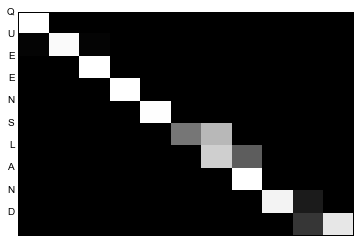

In [90]:
# PLotting image map
idx = 6
img = att[idx]
print(repr(source[idx]))

# target[idx]= ['S', 'A', 'R', 'A', 'N', 'G']
matplotlib.rc('font', family='Arial')
srcl, trgtl = len(source[idx]), len(target[idx])
shape = (0, srcl, trgtl, 0)
plt.yticks( np.arange(trgtl),target[idx] )
plt.xticks( np.arange(0))

plt.imshow(img, cmap='Greys_r', aspect='auto', extent=shape, interpolation='nearest')


In [7]:
def assignLabel(score):
    if score < 0.05:
        return 0
    elif score < 0.25:
        return 1
    elif score < 0.5:
        return 2
    elif score < 0.75:
        return 3
    else:
        return 4
    
def segment(label, st, src):
    token = ''
    newst = st
    flag = 0
    for i in range(st, len(label)):
        if label[i] == 0 and flag == 0:
            continue
        elif label[i] == 0 and flag == 1:
            break
        else:
            token += src[i]
            
            
        if label[i] == 0:
            if token != '':
                newst = i
#                 if label[i-1] > 3:
#                     newst = i
#                 else:
#                     newst = i - 1
                break
            else:
                continue
        else:
            token += src[i] #+ str(label[i])
    
    print(src[st], src[newst], label[newst])
    return token, newst#

segmented_src = []
    
for k in range(len(att)):
    score = att[k].T
    trgt_len = np.shape(score)[0]
    src_len = np.shape(score)[1]
    seg = []
    st = 0
    for t in range(trgt_len):
        label = []
        for s in range(src_len):
            label.append(assignLabel(score[t][s]))
        newtoken, st = segment(label, st, target[k])
        if newtoken != '':
            seg.append(newtoken)
    segmented_src.append(seg)
                
print(segmented_src)

P P 4
P P 0
P P 0
P P 0
P P 0
P P 0
P P 0
P P 0
K K 4
K K 0
K K 0
K K 0
K K 0
K K 0
K K 0
S S 4
S S 0
S S 0
S S 0
M M 4
M M 0
M M 0
M M 0
M M 0
M M 0
T T 4
T T 0
F F 4
F F 0
F F 0
F F 0
F F 0
F F 0
F F 0
F F 0
Q Q 4
Q Q 0
Q Q 0
Q Q 0
Q Q 0
Q Q 0
Q Q 0
Q Q 0
Q Q 0
Q Q 0
Q Q 0
S S 4
S S 0
S S 0
S S 0
S S 0
M M 4
M M 0
M M 0
M M 0
B B 4
B B 0
B B 0
B B 0
B B 0
B B 0
B B 0
B B 0
B B 4
B B 0
B B 0
Y Y 4
Y Y 0
Y Y 0
Y Y 0
Y Y 0
Y Y 0
Y Y 0
Y Y 0
S S 4
S S 0
S S 0
S S 0
S S 0
G G 4
G G 0
G G 0
G G 0
G G 0
T T 4
T T 0
T T 0
T T 0
T T 0
T T 0
S S 4
S S 0
S S 0
S S 0
S S 0
S S 0
S S 0
S S 0
S S 0
Z Z 4
Z Z 0
Z Z 0
Z Z 0
Z Z 0
Z Z 0
Z Z 0
B B 4
B B 0
B B 0
B B 0
B B 0
B B 0
B B 0
M M 4
M M 0
M M 0
P P 4
P P 0
P P 0
P P 0
P P 0
A A 4
A A 0
A A 0
A A 0
H H 4
H H 0
D D 4
D D 0
D D 0
D D 0
D D 0
D D 0
L L 4
L L 0
L L 0
L L 0
L L 0
L L 0
T T 4
T T 0
T T 0
T T 0
T T 0
W W 4
W W 0
W W 0
W W 0
W W 0
F F 4
F F 1
F F 0
F F 0
T T 4
T T 0
T T 0
T T 0
T T 0
T T 0
T T 0
T T 0
W W 4
W W 0
W W 0
W W 0
M M 4
M M 

IndexError: list index out of range